In [1]:
import numpy as np

import matplotlib.pyplot as plt

from hw5 import VortexManager, animate

In [2]:
import ipympl
%matplotlib widget

# Dipole

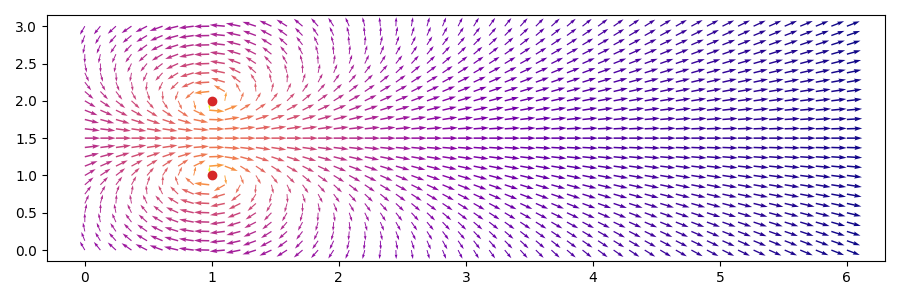

In [14]:
dt = 0.1

x = np.linspace(0, 6, 50)
y = np.linspace(0, 3, 25)

dipole = VortexManager(2)
v1 = dipole.add(1, 1, -1)
v2 = dipole.add(1, 2, 1)

anim = animate(dipole,  x, y, dt, figsize=(9, 3), duration=250)
plt.tight_layout()
plt.show()

# Side Boundaries

# Corner Boundaries